In [99]:
import pandas as pd

pd.read_pickle('results.pkl').sort_values(ascending=False, by=['n'])

,a_min,a_max,b_min,b_max,c_min,c_max,cars,n,p,task,edge,seed,mean_travel_time
4219,3,4,2,3,6,14,44,99.0,0.099499,"(12, 11)","(12, 6)",46.0,-2.856930
4122,2,3,1,3,5,24,32,99.0,0.099499,"(12, 11)","(74, 20)",46.0,-0.002020
4130,2,3,1,3,5,24,32,99.0,0.099499,"(12, 11)","(44, 11)",46.0,-0.211560
4129,2,3,1,3,5,24,32,99.0,0.099499,"(12, 11)","(12, 6)",46.0,-2.820626
4128,2,3,1,3,5,24,32,99.0,0.099499,"(12, 11)","(12, 3)",46.0,-0.188838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15015,1,3,1,3,7,8,33,30.0,0.054772,"(0, 25)","(7, 24)",46.0,-0.370758
15014,1,3,1,3,7,8,33,30.0,0.054772,"(0, 25)","(4, 17)",46.0,-inf
15013,1,3,1,3,7,8,33,30.0,0.054772,"(0, 25)","(16, 24)",46.0,-3.370758
15012,1,3,1,3,7,8,33,30.0,0.054772,"(0, 25)","(28, 6)",46.0,-0.040085


In [79]:
from src.traffic.v3.environment import TrafficModel
from src.traffic.v3.util.network import create_cars, create_random_gnp_graph, UniformLatencyGenerator

network = create_random_gnp_graph(number_of_nodes=50, p=0.070711,
                                  latency_generator=UniformLatencyGenerator(a_min=3,
                                                                            a_max=4,
                                                                            b_min=2,
                                                                            b_max=3,
                                                                            c_min=1,
                                                                            c_max=3),
                                  seed=46)

model = TrafficModel(network, create_cars(network, car_counts={(23, 33): 38},
                                          seed=46))
model.set_edge_restriction((23, 30), allowed=False)
model.cars = create_cars(model.allowed_network, car_counts={(23, 33): 38},
                                          seed=46)

step_statistics_restricted, car_statistics_restricted = model.run_sequentially(10000)

100%|██████████| 10000/10000 [01:24<00:00, 118.69it/s]


In [78]:
from src.traffic.v3.environment import TrafficModel
from src.traffic.v3.util.network import create_cars, create_random_gnp_graph, UniformLatencyGenerator

network = create_random_gnp_graph(number_of_nodes=50, p=0.070711,
                                  latency_generator=UniformLatencyGenerator(a_min=3,
                                                                            a_max=4,
                                                                            b_min=2,
                                                                            b_max=3,
                                                                            c_min=1,
                                                                            c_max=3),
                                  seed=46)

model = TrafficModel(network, create_cars(network, car_counts={(23, 33): 38},
                                          seed=46))
model.set_edge_restriction((23, 30), allowed=True)
model.cars = create_cars(model.allowed_network, car_counts={(23, 33): 38},
                                          seed=46)

step_statistics_unrestricted, car_statistics_unrestricted = model.run_sequentially(10000)

100%|██████████| 10000/10000 [01:16<00:00, 130.57it/s]


<Axes: >

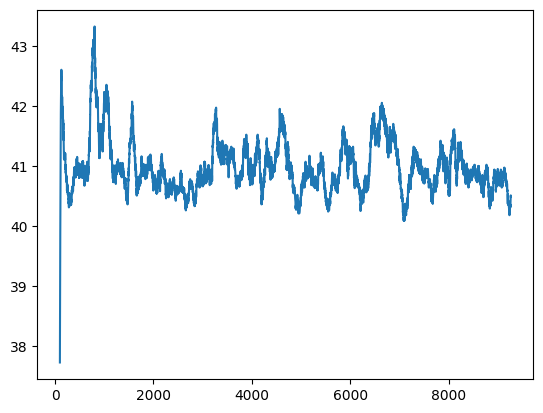

In [85]:
car_statistics_restricted['travel_time'].rolling(window=100).mean().plot()

In [86]:
car_statistics_restricted['travel_time'][-int(len(car_statistics)/2):].mean()

40.9144893111639

<Axes: >

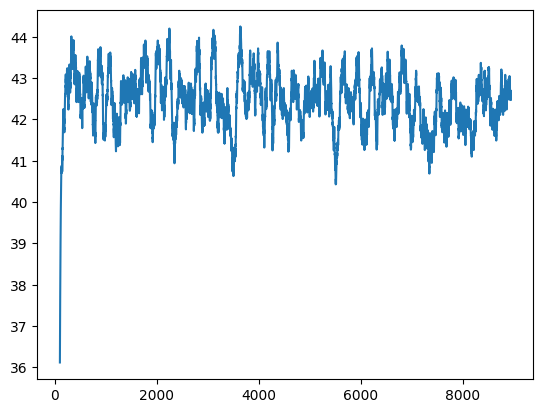

In [87]:
car_statistics_unrestricted['travel_time'].rolling(window=100).mean().plot()

In [84]:
car_statistics_unrestricted['travel_time'][-int(len(car_statistics_unrestricted)/2):].mean()

42.340715883668906

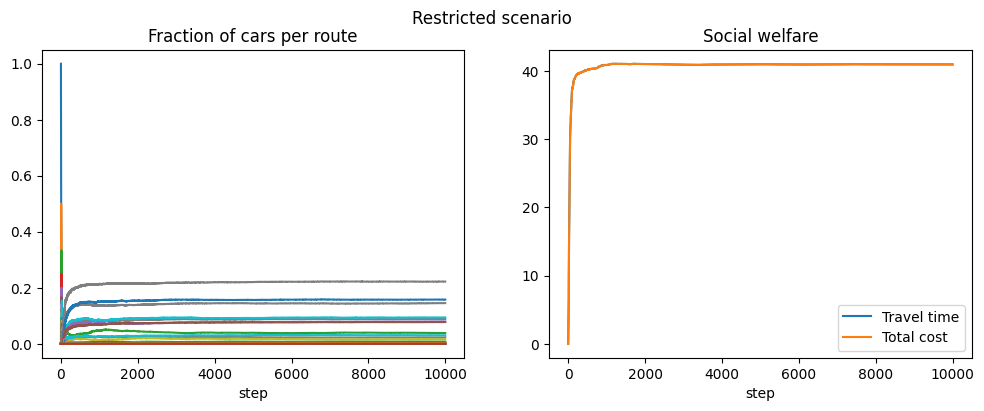

In [82]:
import matplotlib.pyplot as plt

def plot_results(car_stats, *, title):
    stats = car_stats.set_index('step')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    pd.DataFrame({route: stats['route'] == route for route in stats['route'].unique()}).expanding().mean().plot(ax=ax1, legend=False)
    # ax1.legend(stats['route'].unique())
    ax1.set_title('Fraction of cars per route')

    pd.DataFrame({'Travel time': stats['travel_time'], 'Total cost': stats['total_cost']}).expanding().mean().plot(ax=ax2)
    ax2.set_title('Social welfare')

    fig.suptitle(title)

plot_results(car_statistics_restricted, title='Restricted scenario')

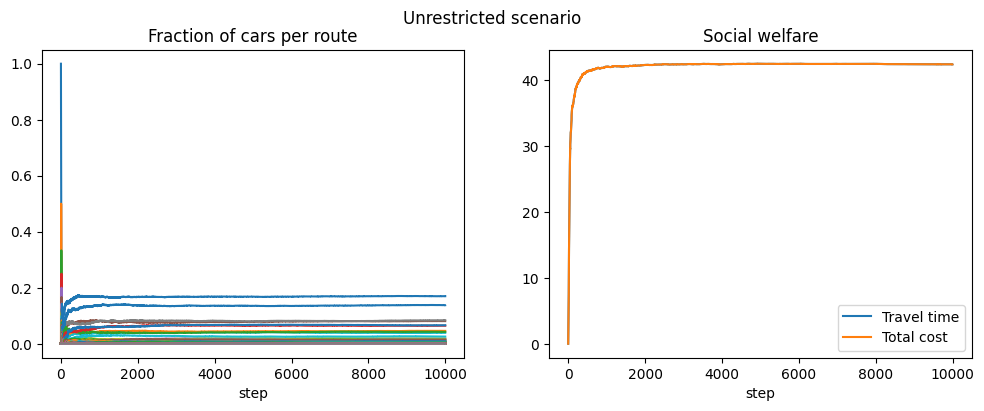

In [83]:
import matplotlib.pyplot as plt

def plot_results(car_stats, *, title):
    stats = car_stats.set_index('step')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    pd.DataFrame({route: stats['route'] == route for route in stats['route'].unique()}).expanding().mean().plot(ax=ax1, legend=False)
    # ax1.legend(stats['route'].unique())
    ax1.set_title('Fraction of cars per route')

    pd.DataFrame({'Travel time': stats['travel_time'], 'Total cost': stats['total_cost']}).expanding().mean().plot(ax=ax2)
    ax2.set_title('Social welfare')

    fig.suptitle(title)

plot_results(car_statistics_unrestricted, title='Unrestricted scenario')

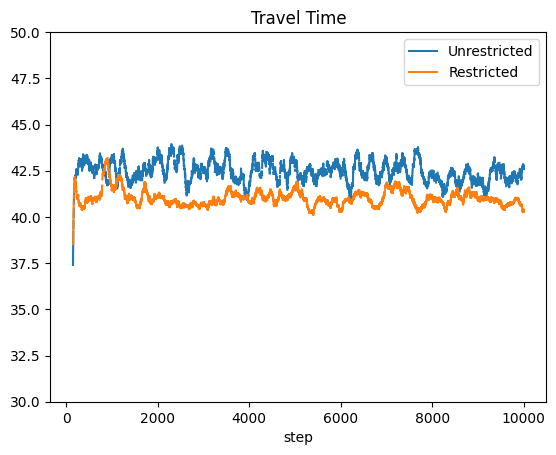

In [95]:
pd.DataFrame({
    'Unrestricted': car_statistics_unrestricted.groupby('step')['travel_time'].mean().rolling(window=100).mean(),
    'Restricted': car_statistics_restricted.groupby('step')['travel_time'].mean().rolling(window=100).mean()
}).plot(xlabel='step', ylim=(30, 50))

plt.title('Travel Time')
plt.show()

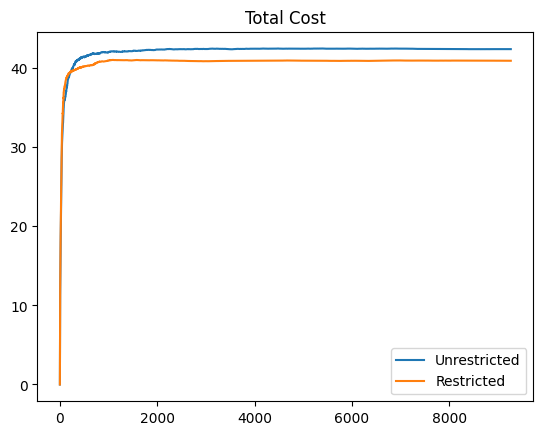

In [96]:
pd.DataFrame({
    'Unrestricted': car_statistics_unrestricted['total_cost'],
    'Restricted': car_statistics_restricted['total_cost']
}).expanding().mean().plot()

plt.title("Total Cost")
plt.show()